In [73]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [265]:
hdir = "/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_multi"
hdir = "/Users/mluksza/Dropbox/Research/05_Resistance/Data_multi/Model/"

In [266]:
rdir = os.path.join(hdir, "Results_nested")
tab = pd.read_csv(os.path.join(rdir, "predictions_max.txt"), sep="\t")

#rdir = os.path.join(hdir, "Results")
#tab = pd.read_csv(os.path.join(rdir, "predictions_sum.txt"), sep="\t")

In [199]:
taus = np.array([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(1.))])


In [156]:
with open(os.path.join(hdir, "mapping.json")) as f:
    mjs = json.load(f)

In [175]:
dos = {}
dcohort = {}
dtype = {}
for el in mjs:
    dos[el['name']] = el["OS"] 
    dcohort[el['name']] = el["cohort"] 
    dtype[el['name']] = el["type"] 

In [176]:
ent1 = np.array(list(tab.Entropy1))

In [178]:
opt = [sorted(list(zip(row, range(len(row)))), key=lambda x: x[0])[0] for row in tau]
list(zip(tab.Patient, tab.Sites2, opt))

[('AR_G726', 'lung', (0.3602533141245561, 57)),
 ('AR_M417', 'lung', (0.7021715179625562, 62)),
 ('AR_C403', 'lung', (0.3968553999990213, 50)),
 ('AR_R566', 'lung', (0.2764372812277298, 50)),
 ('AR_M945', 'lung', (0.6999596202388809, 53)),
 ('AR_M059', 'lung', (4.084512468437737, 64)),
 ('AR_I495', 'lung', (0.639692608148918, 64)),
 ('AR_M807', 'lung', (0.5295982492436746, 27)),
 ('AR_A602', 'lung', (0.6667755762573191, 34)),
 ('AR_C903', 'lung', (0.8629105898961109, 51)),
 ('AR_M459', 'lung', (0.38749104952125424, 51)),
 ('AR_V862', 'lung', (0.3296223483302904, 53)),
 ('AR_K540', 'lung', (0.9392883053354509, 51)),
 ('AR_C985', 'lung', (0.27014152069856384, 50)),
 ('AR_A958', 'lung', (0.1823132299532511, 55)),
 ('AR_S073', 'lung', (0.21873082591923948, 58)),
 ('AR_C672', 'lung', (0.27677924874642895, 50)),
 ('AR_L978', 'lung', (0.2121415974218225, 0))]

In [267]:
colors = list(tab.Trunkality_total)
scolors = list(tab.Trunkality_shared)
pnames = list(tab.Patient)

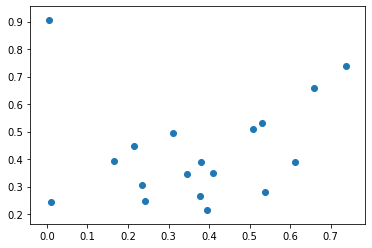

In [238]:
plt.scatter(colors, scolors)

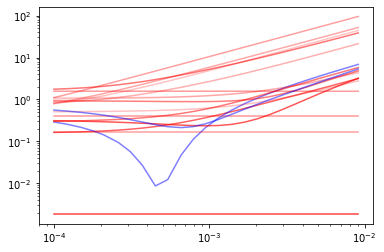

In [268]:
tabs = [tab]#, tab[tab.Sites2=="Pancreas"], tab[tab.Sites2!="Pancreas"]]
taus = np.array([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(30.))])
taus = list(set(list(-taus) + [0] + list(taus)))
taus.sort()

taus = np.array([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(1.))])
taus = list(taus)
for tab0 in tabs:
    ent1 = np.array(tab0.iloc[:,5:].Entropy1)
    tau = np.array(tab0.iloc[:,10:])
    #taus = list([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(10.))])
    for e1, col, scol, pname, x in zip(ent1, colors, scolors, pnames, tau):
        data = [el for el in zip(taus, x) if abs(el[0])<=0.01]
        xx = [el[0] for el in data]
        yy = [el[1]/e1 for el in data]
        if col<0.1:
            fcol = 'blue'
        else:
            fcol = 'red'
        plt.plot(xx, yy, color=fcol, alpha = (col if col>0.01 else 0.5), label=pname + " " + str(round(col,3)))
    plt.xscale("log")
    plt.yscale("log")
    #plt.legend()
    plt.show()
    
#taus = [float(col.replace("tau_","")) for col in list(tab.columns) if "tau_" in col]
#len(x)

In [116]:
taus = list([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(10.))])


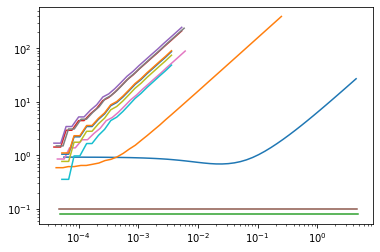

In [122]:
for e1, x in zip(ent1, tau):
    plt.plot(taus/e1, x)
    plt.xscale("log")
    plt.yscale("log")

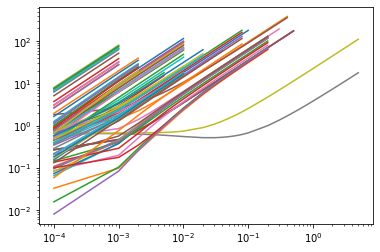

In [69]:
for e1, x in zip(ent1, tau):
    plt.plot(taus, x/e1)
    plt.xscale("log")
    plt.yscale("log")

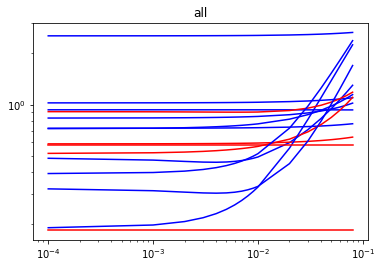

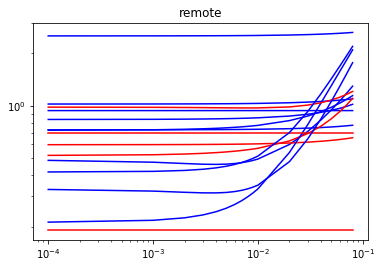

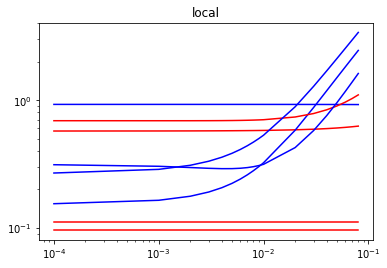

In [108]:
dline = {}

tab=tabKD500sum
tab = tabAR
taus = [float(col.replace("tau_","")) for col in list(tab.columns) if "tau_" in col]
tabs = [tab, tab[tab.Sites2 != "Pancreas"], tab[tab.Sites2 == "Pancreas"]]
names = ["all", "remote", "local"]

for tab0, name in zip(tabs, names):
    dline = {}
    for line in tab0.itertuples(index=False):
        vals = list(line)[6:]
        if line.Patient not in dline:
            dline[line.Patient] = []
        dline[line.Patient].append(vals)
    for pname in dline:
        dline[pname] = pd.DataFrame(dline[pname])
        dline[pname] = list(dline[pname].mean())

    for pname in dline:
        if dtype[pname] != "Metachronous":
            continue    
        col = 'red' if dos[pname]>30 else 'blue'
        col = 'red' if dcohort[pname]=="STS" else 'blue'

        plt.plot(taus, dline[pname], c=col)
        plt.xscale("log")
        plt.yscale("log")
        plt.title(name)
    plt.show()

In [65]:
dline

{'11-LTS': [0.8327755215122744,
  0.8329548427776815,
  0.8345752922523719,
  0.8363896088975099,
  0.8382184276270384,
  0.8400617043329734,
  0.8419193946246992,
  0.8437914538336744,
  0.8456778370181441,
  0.8475784989678564,
  0.8494933942087831,
  0.8514224770078438,
  0.8714833836553568,
  0.8929109980108128,
  0.9156560504518034,
  0.9396677067673912,
  0.9648940140351708,
  0.9912823244282224,
  1.0187796917997654],
 '16-LTS': [1.0221994045085014,
  1.022286733083816,
  1.0230731010100689,
  1.0239477100680157,
  1.0248232313373962,
  1.025699664472007,
  1.02657700912439,
  1.0274552649458326,
  1.02833443158637,
  1.0292145086947917,
  1.0300954959186377,
  1.0309773929042068,
  1.0398463209550806,
  1.048805826956698,
  1.0578555370441045,
  1.0669950654316982,
  1.0762240146587172,
  1.0855419758400395,
  1.094948528921962],
 '28-LTS': [0.48569853055603307,
  0.48411259782346255,
  0.4723876005960248,
  0.4640750203413734,
  0.45982364569790024,
  0.4588453226223863,
  0.4

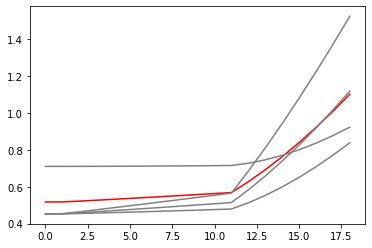

In [63]:
plt.plot(list(dline['PAM37'].mean()), c='red')
for r in dline['PAM37'].itertuples():
    plt.plot(list(r[1:]), color='gray')

[0.5167348038611648,
 0.5172094977865059,
 0.5215200909927555,
 0.5263891476297509,
 0.5313398438705523,
 0.5363702491568426,
 0.5414786128276828,
 0.5466633464694968,
 0.551923007902245,
 0.5572562866553549,
 0.5626619907993126,
 0.5681390350102611,
 0.6266517441353032,
 0.6915843478818472,
 0.7625812758940035,
 0.8393698676807648,
 0.9216753490958901,
 1.0091972074363103,
 1.1016081699338383]

In [52]:
dline['PAM37'].shape

(4, 19)